# Projeto WPT - Grupo 2
Arthur Tamm, Caio Bôa, Gabriel Hermida e Pedro Civita

## Importando Bibliotecas

In [227]:
import numpy as np
from capacitor import Capacitor
from indutor import Indutor
import cmath
from numpy import sqrt, pi, linalg
import matplotlib.pyplot as plt

# Etapa 1

In [228]:
def freqResonancia(l, c):
    return 1/(2*pi*sqrt(l*c))

def CalcularTransformadorProjeto(v1, rc, r, l, m, c, f):
    w = 2*pi*f

    xl = w*l*1j
    xc = 1/(w*c*1j)
    xm = m*w*1j
    
    Z=np.array([[r+xl+xc, -xm],[-xm, xl+r+1/(1/rc+1/xc)]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)

    Zeq = 1/(1/rc+1/xc)
    V2 = I[1]*Zeq

    return abs(I[0]), abs(I[1]), V2

def real(zeq):
    return abs(zeq)*np.cos(cmath.phase(zeq))

In [229]:
l  = 0.1
c = 1e-9

freqRes = freqResonancia(l, c)
print("Frequencia de ressonancia: ", freqRes)

v1 = 10

rc = 500
r = 1

k = 0.5
m = k*l

frequencies = np.arange(1000, 50000, 100)

values = {"i1": [], "i2": [], "v2": []}

Frequencia de ressonancia:  15915.494309189533


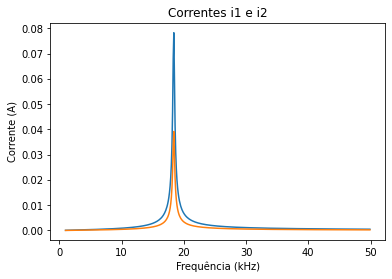

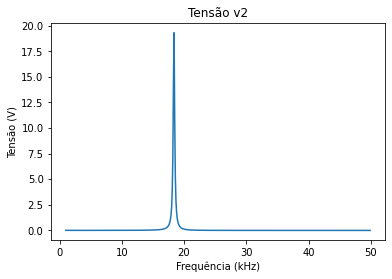

In [230]:
for f in frequencies:
    i1, i2, v2 = CalcularTransformadorProjeto(v1, rc, r, l, m, c, f)
    values["i1"].append(i1)
    values["i2"].append(i2)
    values["v2"].append(v2)
    
plt.plot(frequencies/1e3, values["i1"])
plt.plot(frequencies/1e3, values["i2"])

plt.title("Correntes i1 e i2")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Corrente (A)")
plt.show()

plt.plot(frequencies/1e3, values["v2"])
plt.title("Tensão v2")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Tensão (V)")
plt.show()



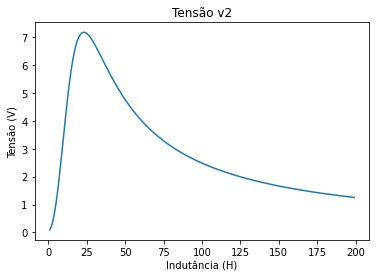

7.175359898431158


In [231]:
l_list = np.arange(1, 200, 1)
v2_list = []

for i in range(len(l_list)):
    l = l_list[i]
    fr = freqResonancia(l, c)
    _,_, v2 = CalcularTransformadorProjeto(v1, rc, r, l, m, c, fr)
    v2_list.append(v2)

plt.plot(l_list, v2_list)
plt.title("Tensão v2")
plt.xlabel("Indutância (H)")
plt.ylabel("Tensão (V)")
plt.show()

print(real(max(v2_list)))

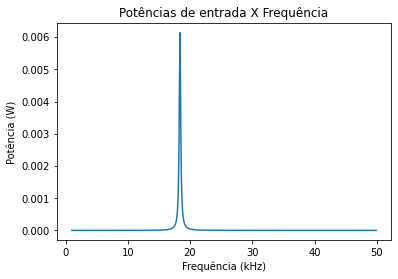

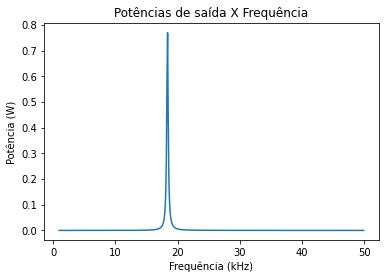

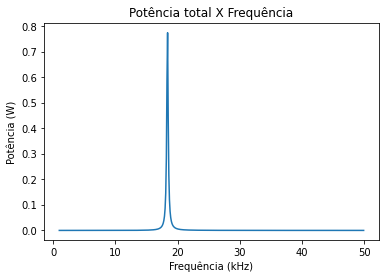

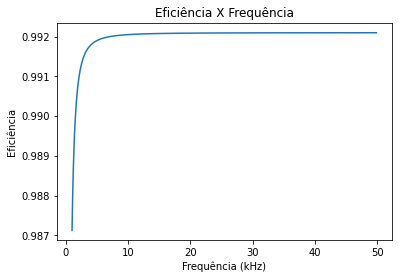

In [232]:
# Construção de gráficos das potências e da eficiência em função da frequência

# Potência de entrada
p1 = np.array(values["i1"])**2 * r

# Potência de saída
p2 = np.array(values["i2"])**2 * rc

# Potência total
pt = p1 + p2

# Eficiência
eff = p2/pt

plt.plot(frequencies/1e3, p1)
plt.title("Potências de entrada X Frequência")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Potência (W)")
plt.show()

plt.plot(frequencies/1e3, p2)
plt.title("Potências de saída X Frequência")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Potência (W)")
plt.show()

plt.plot(frequencies/1e3, pt)
plt.title("Potência total X Frequência")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Potência (W)")
plt.show()

plt.plot(frequencies/1e3, eff)
plt.title("Eficiência X Frequência")
plt.xlabel("Frequência (kHz)")
plt.ylabel("Eficiência")
plt.show()